 $\begin{cases}
  \frac{d}{dt}F(t) = \beta_FF(t)\left(1 - \frac{F(t)}{\theta_F}\right) - \gamma_{FN}N(t) + \sigma_1 dW_1\\
  \frac{d}{dt}N(t) = \beta_NN(t) + \beta_{FN}F(t)N(t) - \mu_NN(t) + \sigma_2 dW_2\\
  \frac{d}{dt}W(t) = \frac{\beta_WW(t)\left(C_W - W(t)\right)}{\theta_W + \gamma_{WF}F(t)}
 \end{cases}$


 $W(t) - \text{высота пшеницы}$

 $F(t) - \text{концентрация грибов рода Фузариум в почве}$

 $N(t) - \text{концентрация нематод в почве}$

In [373]:
import numpy as np
from scipy.integrate import solve_ivp
import sdeint
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def f(x, t):
    bf = 1.01 * (10 ** (-1));
    thf = 1.29 * (10 ** 6);
    gfn = 3.32 * (10 ** (-6));
    bn = 1.18 * (10 ** (-11));
    bfn = 6.61 * (10 ** (-7));
    mn = 5.76 * (10 ** (-1));
    bw = 1.23;
    thw = 1.0018;
    cw = 83.34
    gwf = 4.44 * (10 ** (-3));

    dFdt = bf * x[0] * (1 - x[0] / thf) - gfn * x[0] * x[1];
    dNdt = bn * x[1] + bfn * x[0] * x[1] - mn * x[1];
    dWdt = (bw * x[2] * (cw - x[2])) / (thw + gwf * x[0]);
    return np.array([dFdt, dNdt, dWdt])

def sigma(x, t):
    return np.diag([10000, 0, 0])



In [374]:
tspan = np.linspace(0.0, 60.0, 121)
x0 = np.array([66.63 * (10 ** 4), 30.59 * (10 ** 2), 17.29])

In [375]:
result = np.zeros((100,121,3))
for i in range (100):
    result[i] = sdeint.itoint(f, sigma, x0, tspan)

In [376]:
res = np.zeros((121, 3))
for i in range (100):
    res += result[i]
res /= 100

In [377]:
disp = np.zeros((121, 3))
for i in range (100):
    disp += (result[i] - res) ** 2
disp /= 100
mn_sq = disp ** 0.5

In [371]:
res1 = res + mn_sq
res2 = res - mn_sq

Text(0.5, 0, 'Time, days')

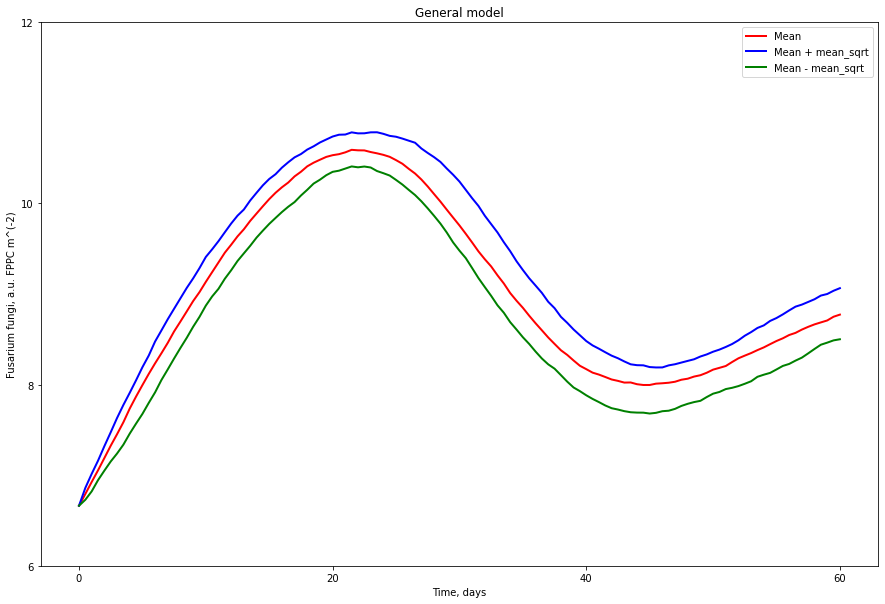

In [378]:
fig1, pic1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(10)
pic1.xaxis.set_major_locator(ticker.MultipleLocator(20))
pic1.yaxis.set_major_locator(ticker.MultipleLocator(2))
pic1.plot(tspan, res[:, 0] / 100000, 'r', linewidth=2.0, label = 'mean')
pic1.plot(tspan, res1[:, 0] / 100000, 'b', linewidth=2.0, label = 'mean + mean_sqrt')
pic1.plot(tspan, res2[:, 0] / 100000, 'g', linewidth=2.0, label = 'mean - mean_sqrt')
plt.ylim([6, 12])
plt.legend()
pic1.set_title("General model")
pic1.set_ylabel("Fusarium fungi, a.u. FPPC m^(-2)")
pic1.set_xlabel("Time, days")

Text(0.5, 0, 'Time, days')

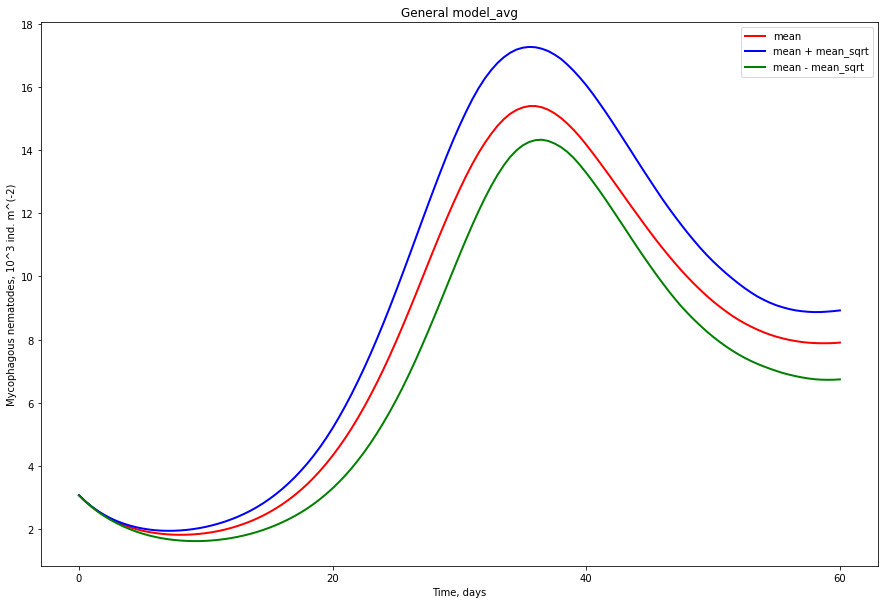

In [379]:
fig2, pic2 = plt.subplots()
fig2.set_figwidth(15)
fig2.set_figheight(10)
pic2.xaxis.set_major_locator(ticker.MultipleLocator(20))
pic2.plot(tspan, res[:, 1] / 1000, 'r', linewidth=2.0, label = 'mean')
pic2.plot(tspan, res1[:, 1] / 1000, 'b', linewidth=2.0, label = 'mean + mean_sqrt')
pic2.plot(tspan, res2[:, 1] / 1000, 'g', linewidth=2.0, label = 'mean - mean_sqrt')
plt.legend()
pic2.set_title("General model_avg")
pic2.set_ylabel("Mycophagous nematodes, 10^3 ind. m^(-2)")
pic2.set_xlabel("Time, days")

Text(0.5, 0, 'Time, days')

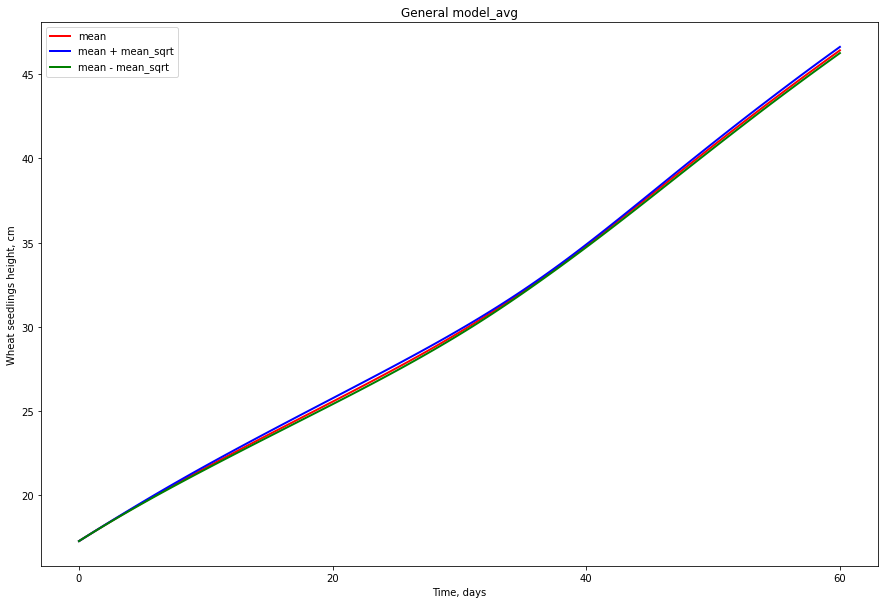

In [381]:
fig3, pic3 = plt.subplots()
fig3.set_figwidth(15)
fig3.set_figheight(10)
pic3.xaxis.set_major_locator(ticker.MultipleLocator(20))
pic3.plot(tspan, res[:, 2], 'r', linewidth=2.0, label = 'mean')
pic3.plot(tspan, res1[:, 2], 'b', linewidth=2.0, label = 'mean + mean_sqrt')
pic3.plot(tspan, res2[:, 2], 'g', linewidth=2.0, label = 'mean - mean_sqrt')
plt.legend()
pic3.set_title("General model_avg")
pic3.set_ylabel("Wheat seedlings height, cm")
pic3.set_xlabel("Time, days")